# Numpy와 Pandas 응용

## 2021년 11월 06일 안상호

---

1. 성적 처리
2. 기술 통계
3. Gradient Descent



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##  1. 성적 처리

| 이름 | 중간 | 기말 | 수행 ||
| :-------: |:-------:| :-------:| :-------:|
| 학생1      | 100 | 50  | 90|
| 학생2      | 70      |   85  | 80|
| 학생3 | 45      |    75  | 100 |

위와 같은 1학기의 성적표가 있고, (**중간**, **기말**, **수행**)의 반영 비율이 $(35\%, 45\%, 20\%)$ 일때의 총점 계산을 선형대수적으로 처리해 보겠습니다. 우선 위의 점수 테이블과 반영 비율을 각각, 행렬($matrix$)과  벡터($vector$)로 표기하면 아래와 같습니다.

$$
X = 
\begin{pmatrix} 
100 & 50 & 90 \\
70 & 85 & 80 \\
45 & 75 & 100 
\end{pmatrix} 
$$

$$ \vec{p} = (0.35, 0.45, 0.2)$$

따라서 행렬과 벡터의 내적계산을 통해 원하는 결과를 얻을 수 있게되는 것입니다.

$$
X \cdot \vec{p} = 
\begin{pmatrix} 
100 & 50 & 90 \\
70 & 85 & 80 \\
45 & 75 & 100 
\end{pmatrix} \cdot
(0.35, 0.45, 0.2)
$$


In [3]:
import numpy as np 

X = np.array([[100, 50, 90],
              [70, 85, 80],
              [45, 75, 100]])

p = np.array([0.35, 0.45, 0.2])

print(X.dot(p))

[75.5  78.75 69.5 ]


## 2. 기술 통계

+ **기술 통계($Descriptive$ $statistics$)**는 정보 수집의 특징을 정량적으로 설명하거나 요약하는 요약 통계입니다[[1]](https://en.wikipedia.org/wiki/Descriptive_statistics#cite_note-1). 즉, 데이터를 요약, 설명하는데 초점이 맞추어져 있으며 크게 2가지 기법이 있다.
    1. 집중화 경향 ($Central$ $tendency$): 데이터가 어떤 값에 집중되어 있는가?
        -  평균(Mean, Average)
    2. 분산도($Variation$): 데이터가 어떻게 퍼져 있는가?
        - 분산(Variance), 표준편차(Standard Deviation) 



> 데이터의 갯수가 $n$개 이고, 데이터의 각 성분을 $d_i$로 표현할 때, 

$$\text{Mean} = \cfrac{d_1 + d_2 + \cdots + d_n}{n} = \cfrac{\sum d_i}{n}$$


$$
\begin{aligned}
\text{Variance} &= \cfrac{(d_1 - Mean)^2 + (d_2 - Mean)^2 + \cdots + (d_n - Mean)^2}{n - 1} \\
&=\cfrac{\sum (d_i - Mean)^2}{n - 1}
\end{aligned}
$$


$$\text{Std} = \sqrt{\text{Var}}$$


In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/iris.csv")
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [5]:
d = data.iloc[:, 1:5].values

n = d.shape[0]
data_mean = d.sum(axis=0)/n
print("각 열의 평균: {}".format(data_mean))

data_var = ((d - data_mean)**2 ).sum(axis=0)/(n - 1)
print("각 열의 분산: {}".format(data_var))

data_std = data_var**(1/2)
print("각 열의 표준편차: {}".format(data_std))

    

각 열의 평균: [5.84333333 3.05733333 3.758      1.19933333]
각 열의 분산: [0.68569351 0.18997942 3.11627785 0.58100626]
각 열의 표준편차: [0.82806613 0.43586628 1.76529823 0.76223767]


`ndarray` 클래스에 속한 `.sum()` 함수는 **axis** 설정이 가능하여 행별로 더할지, 열별로 더할지 설정할 수 있습니다.

### 비교

- `pandas`의 `describe()`함수를 사용!

In [6]:
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 3. Gradient Descent

In [7]:
df = pd.read_csv('data/ex1data1.txt', names=['population', 'profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit in $10,000s')

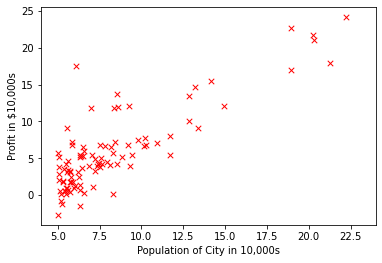

In [10]:
%matplotlib inline

X = np.c_[np.ones(df.shape[0]), df.population.values] 
y = np.c_[df.profit.values]

plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

### 3.1. Compute Cost

+ formula

$$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

> 즉, 주어진 `theta` 값이 얼마나 많은 Cost를 발생 시키는가?

In [11]:
from __future__ import division

def computeCost(X, y, theta=[[0], [0]]):
    """
    (예측값 - y)^2 계산
    y절편은 1*(theta) 로 해결
    theta = [y절편 가중치, x1 가중치]
    """
    m = y.size ### 데이터 갯수 저장
    theta = np.array(theta)
    J = 0 ### J 초기화
    
    h = X.dot(theta) ### 1*0 + x*0
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [12]:
computeCost(X,y)

32.072733877455676

### 3.2.  Gradient Descent

+ formula

$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

- **Insight** : J를 구하는 식을 미분한 값을 빼준다 

- $\alpha$ : learning rate 

+ iteration test


In [13]:
m = y.size
theta = np.array([[0], [0]]) ### 2X1
J_history = np.zeros(1000)

for iter in np.arange(1000):
    h = X.dot(theta) ### 97X1
    theta = theta - 0.02*(1/m)*X.T.dot(h - y) ### 2X97 * 97X1
    J_history[iter] = computeCost(X, y, theta.tolist())
print(J_history)

[16.76964237 10.40757975  7.75918348  6.65328753  6.18810582  5.98908452
  5.90065377  5.85819792  5.83487879  5.81954893  5.80757803  5.79704258
  5.78714338  5.7775482   5.76811877  5.75879735  5.74955971  5.74039548
  5.73130008  5.72227135  5.71330809  5.70440955  5.69557514  5.68680436
  5.67809671  5.66945175  5.660869    5.65234803  5.64388839  5.63548964
  5.62715134  5.61887305  5.61065434  5.60249479  5.59439396  5.58635144
  5.5783668   5.57043964  5.56256952  5.55475605  5.54699882  5.53929742
  5.53165145  5.52406051  5.51652421  5.50904214  5.50161393  5.49423918
  5.48691752  5.47964854  5.47243189  5.46526718  5.45815403  5.45109208
  5.44408096  5.4371203   5.43020973  5.42334891  5.41653747  5.40977505
  5.4030613   5.39639587  5.38977842  5.38320859  5.37668605  5.37021046
  5.36378147  5.35739876  5.35106198  5.34477082  5.33852493  5.332324
  5.32616769  5.3200557   5.3139877   5.30796337  5.3019824   5.29604447
  5.29014929  5.28429653  5.2784859   5.27271709  5.2

In [14]:
np.matmul(X.T, X.dot(np.array([[0,0]]).transpose()) - y)

array([[ -566.3961    ],
       [-6336.89842532]])

theta:  [-3.63029144  1.16636235]


Text(0.5, 0, 'Iterations')

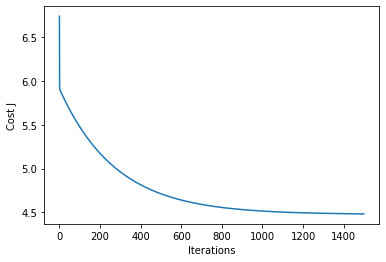

In [15]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    theta = np.array(theta) ### 2X1
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta) ### 97X1
        theta = theta - alpha*(1/m)*X.T.dot(h - y)
        J_history[iter] = computeCost(X, y, theta.tolist())
    return(theta, J_history)

# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y, alpha = 0.01)
print('theta: ',theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

## Reference

- 책
    + 밑바닥 부터 시작하는 데이터 과학
    + 밑바닥 부터 시작하는 딥러닝
- 웹사이트
    + numpy
        - https://docs.scipy.org/doc/numpy/user/quickstart.html
        - https://github.com/WegraLee/deep-learning-from-scratch/tree/master/ch01
    + pandas
        - https://medium.com/@5eo1ab/pandas-%EC%93%B0%EB%8A%94-%EC%9D%B4%EC%9C%A0-9063a90b0bd5
        - https://wikidocs.net/2873